## Домашнее задание № 15
### Козел А.Г. 20.11.2022 v.2 - 4.12.2022
Решить задачу регрессии. Получить максимальную метрику качества (R2, RMSE). 
Не забываем про введение и выводы.

### Об этом файле
Это исторические данные, охватывающие продажи с 05.02.2010 по 01.11.2012, в файле продаж в магазине Walmart . В этом файле вы найдете следующие поля:\

* Store - номер магазина
* Date - неделя продаж
* Weekly_Sales - продажи для данного магазина
* Holiday_Flag - является ли неделя особым праздником неделя 1 – праздничная (выходная) неделя 0 – непраздничная неделя
* Temperature - Температура в день продажи
* Fuel_Price - Стоимость топлива в регионе
* CPI - Преобладающий индекс потребительских цен
* Unemployment - Преобладающий уровень безработицы
* Holiday Event\ Super Bowl (Суперкубок): 12 февраля 2010 г., 11 февраля 2011 г., 10 февраля 2012 г., 8 февраля 2013 г.\
Labour Day (День труда): 10 сентября 2010 г., 9 сентября 2011 г., 7 сентября 2012 г. , 6-сен-13\
 Thanksgiving (День Благодарения): 26-ноя-10, 25-ноябрь-11, 23-ноябрь-12, 29-ноябрь-13\
Christmas (Рождество): 31-дек-10, 30-дек-11, 28-декабрь -12, 27-дек-13


In [1]:
# Загружаем требуемые библиотеки.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')




In [2]:
df = pd.read_csv('Walmart.csv', sep=',', encoding="cp1251") 
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Пропуски значений отсутствуют

In [5]:
# количество уникальных значений
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [6]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


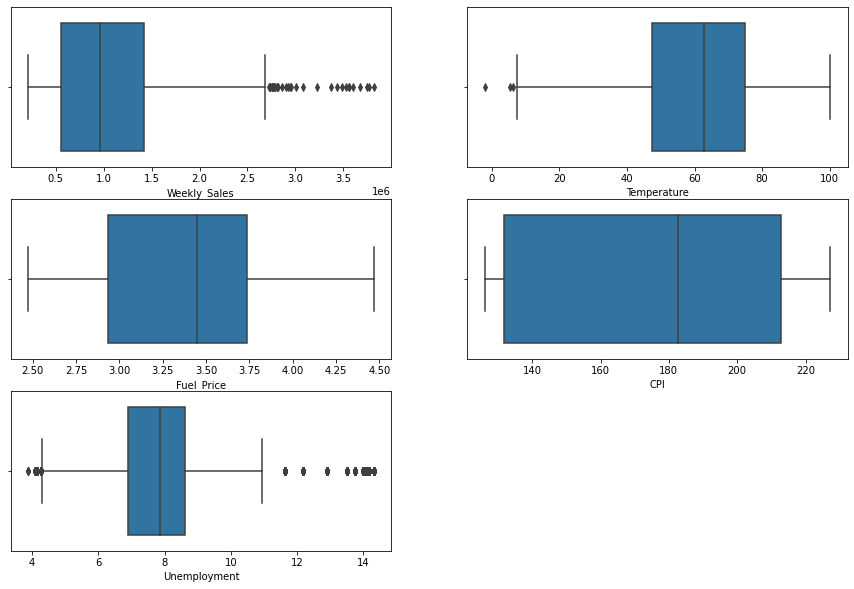

In [7]:
n = 1

plt.figure(figsize=(15,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if n<=5:
            plt.subplot(3,2,n);
            n+=1
            sns.boxplot(df[i]);
           
            plt.xlabel(i);

## Обработка столбца "Date"

Holiday Event:
* Super Bowl (Суперкубок): 12 февраля 2010 г., 11 февраля 2011 г., 10 февраля 2012 г., 8 февраля 2013 г.
* Labour Day (День труда): 10 сентября 2010 г., 9 сентября 2011 г., 7 сентября 2012 г. , 6-сен-13
* Thanksgiving (День Благодарения): 26-ноя-10, 25-ноябрь-11, 23-ноябрь-12, 29-ноябрь-13
* Christmas (Рождество): 31-дек-10, 30-дек-11, 28-декабрь -12, 27-дек-13

In [8]:
# Рассмотрим промежуток, за который даны результаты
df['Date'].head(2).append(df['Date'].tail(2)) 

0       05-02-2010
1       12-02-2010
6433    19-10-2012
6434    26-10-2012
Name: Date, dtype: object

In [9]:
df_holiday = df.loc[df['Holiday_Flag']== 1]
df_holiday['Date'].unique() 

array(['12-02-2010', '10-09-2010', '26-11-2010', '31-12-2010',
       '11-02-2011', '09-09-2011', '25-11-2011', '30-12-2011',
       '10-02-2012', '07-09-2012'], dtype=object)

In [10]:
df.loc[(df['Date'] == '12-02-2010')|(df['Date'] == '11-02-2011')|(df['Date'] == '10-02-2012'),'Super_Bowl'] = 1
df.loc[(df['Date'] != '12-02-2010')&(df['Date'] != '11-02-2011')&(df['Date'] != '10-02-2012'),'Super_Bowl'] = 0

In [11]:
df.loc[(df['Date'] == '10-09-2010')|(df['Date'] == '09-09-2011')|(df['Date'] == '07-09-2012'),'Labour Day'] = 1
df.loc[(df['Date'] != '10-09-2010')&(df['Date'] != '09-09-20119')&(df['Date'] != '07-09-2012'),'Labour Day'] = 0

In [12]:
df.loc[(df['Date'] == '26-11-2010')|(df['Date'] == '25-11-2011'),'Thanksgiving'] = 1
df.loc[(df['Date'] != '26-11-2010')&(df['Date'] != '25-11-2011'),'Thanksgiving'] = 0

In [13]:
df.loc[(df['Date'] == '31-12-2010')|(df['Date'] == '30-12-2011'),'Christmas'] = 1
df.loc[(df['Date'] != '31-12-2010')&(df['Date'] != '30-12-2011'),'Christmas'] = 0

In [14]:
# Выделим столбцы 'год', 'месяц', 'неделя', 'деньнедели'
df["Date"] = pd.to_datetime(df["Date"]) 
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year
df['weekday'] =df['Date'].dt.weekday

In [15]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labour Day,Thanksgiving,Christmas,week,month,year,weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,17,5,2010,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,1.0,0.0,0.0,0.0,48,12,2010,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0.0,0.0,0.0,0.0,7,2,2010,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0.0,0.0,0.0,0.0,8,2,2010,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0.0,0.0,0.0,0.0,18,5,2010,0


In [16]:
df.groupby('weekday')['Weekly_Sales'].mean() 

weekday
0    1.088916e+06
1    1.070389e+06
2    1.030142e+06
3    1.059165e+06
4    1.038485e+06
5    1.046277e+06
6    1.053356e+06
Name: Weekly_Sales, dtype: float64

In [17]:
df.groupby('month')['Weekly_Sales'].mean() 

month
1     9.476139e+05
2     1.054597e+06
3     1.024975e+06
4     1.024324e+06
5     1.035379e+06
6     1.064848e+06
7     1.014212e+06
8     1.044874e+06
9     1.009457e+06
10    1.030631e+06
11    1.133751e+06
12    1.210255e+06
Name: Weekly_Sales, dtype: float64

In [18]:
df.groupby('year')['Weekly_Sales'].mean() 

year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='month'>

<Figure size 1440x2880 with 0 Axes>

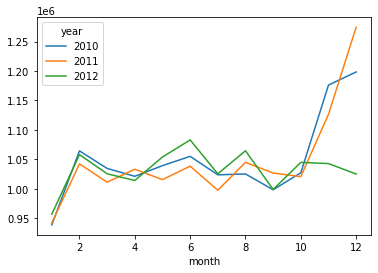

In [19]:
fig = plt.figure(figsize=(20, 40))
# Adds subplot on position 1
#ax = fig.add_subplot(121)
fig.set_size_inches(20, 40)
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()


<AxesSubplot:xlabel='weekday'>

<Figure size 1440x288 with 0 Axes>

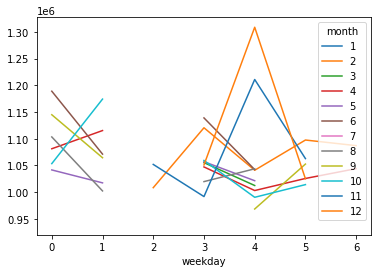

In [20]:
plt.figure(figsize=(20,4))


monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "month" , index = "weekday")
monthly_sales.plot()

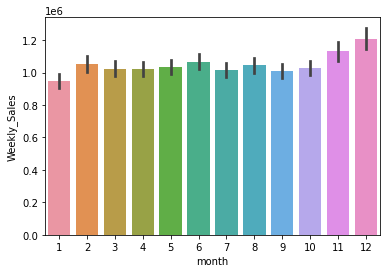

In [21]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)

<AxesSubplot:xlabel='week'>

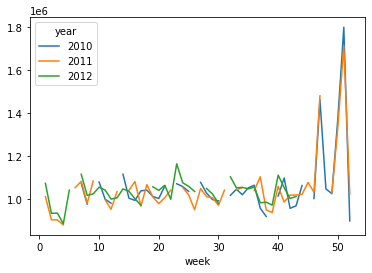

In [22]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

<AxesSubplot:xlabel='Temperature'>

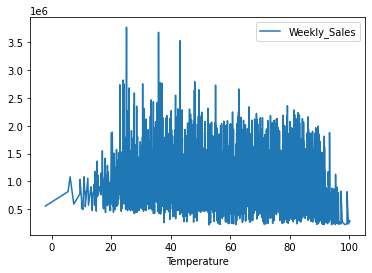

In [23]:
temperature = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temperature.plot()

<AxesSubplot:xlabel='Fuel_Price'>

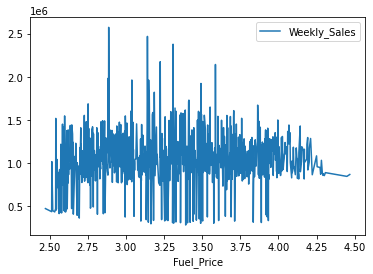

In [24]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<AxesSubplot:xlabel='CPI'>

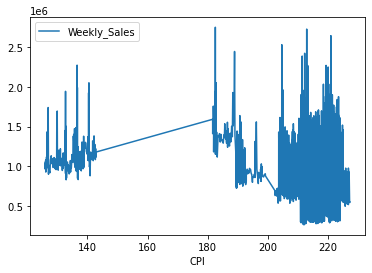

In [25]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

In [26]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labour Day,Thanksgiving,Christmas,week,month,year,weekday
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,0.0,0.0,0.0,0.0,17,5,2010,6
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,1.0,0.0,0.0,0.0,48,12,2010,3
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,0.0,0.0,0.0,0.0,7,2,2010,4
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,0.0,0.0,0.0,0.0,8,2,2010,4
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0.0,0.0,0.0,0.0,18,5,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,0.0,0.0,0.0,0.0,39,9,2012,4
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,0.0,0.0,0.0,0.0,19,5,2012,3
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,0.0,0.0,0.0,0.0,50,12,2012,0
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,0.0,0.0,0.0,0.0,42,10,2012,4


Удалила дату, т.к. уже всю нелбходимую информацию из неё взяла. И праздничный день, т.к. ввела новые столбцы, разделив праздники.

In [27]:
df.drop(['Date', 'Holiday_Flag' ], axis = 1, inplace= True)

Удалила год,т.к. он уникален и не участвует в предсказании

In [28]:
df.drop(['year' ], axis = 1, inplace= True)

In [29]:
df.corr()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labour Day,Thanksgiving,Christmas,week,month,weekday
Store,1.000000e+00,-0.335332,-0.022659,0.060023,-0.209492,0.223531,-6.168883e-18,-1.023046e-16,4.129062e-19,-8.637093e-18,1.038488e-15,6.289676e-16,-2.243183e-15
Weekly_Sales,-3.353320e-01,1.000000,-0.063810,0.009464,-0.072634,-0.106176,8.343093e-03,-6.152748e-04,8.954878e-02,-1.817780e-02,6.610484e-02,6.753523e-02,-2.104085e-02
Temperature,-2.265908e-02,-0.063810,1.000000,0.144982,0.176888,0.101158,-2.006272e-01,9.415269e-02,-7.687759e-02,-1.505193e-01,7.318701e-02,6.643970e-02,1.833136e-02
Fuel_Price,6.002295e-02,0.009464,0.144982,1.000000,-0.170642,-0.034684,-7.639483e-02,-1.988966e-02,-4.734866e-02,-5.162723e-02,-4.193804e-02,-5.283174e-02,-2.651216e-02
CPI,-2.094919e-01,-0.072634,0.176888,-0.170642,1.000000,-0.302020,-3.544124e-03,1.644027e-03,-1.824322e-03,-9.723483e-04,2.782979e-03,1.478843e-03,-9.595877e-03
Unemployment,2.235313e-01,-0.106176,0.101158,-0.034684,-0.302020,1.000000,1.096197e-02,-1.055242e-02,8.927550e-03,8.927550e-03,-6.038021e-03,-2.061552e-03,3.777320e-02
Super_Bowl,-6.168883e-18,0.008343,-0.200627,-0.076395,-0.003544,0.010962,1.000000e+00,-1.743420e-02,-1.743420e-02,-1.743420e-02,1.815857e-01,1.994002e-01,-1.614657e-01
Labour Day,-1.023046e-16,-0.000615,0.094153,-0.019890,0.001644,-0.010552,-1.743420e-02,1.000000e+00,-1.418440e-02,-1.418440e-02,6.566109e-02,7.259032e-02,-8.962207e-02
Thanksgiving,4.129062e-19,0.089549,-0.076878,-0.047349,-0.001824,0.008928,-1.743420e-02,-1.418440e-02,1.000000e+00,-1.418440e-02,1.723604e-01,1.622312e-01,3.561528e-02
Christmas,-8.637093e-18,-0.018178,-0.150519,-0.051627,-0.000972,0.008928,-1.743420e-02,-1.418440e-02,-1.418440e-02,1.000000e+00,2.133985e-01,1.980876e-01,3.561528e-02


Text(0.5, 1.0, 'correlation of feature')

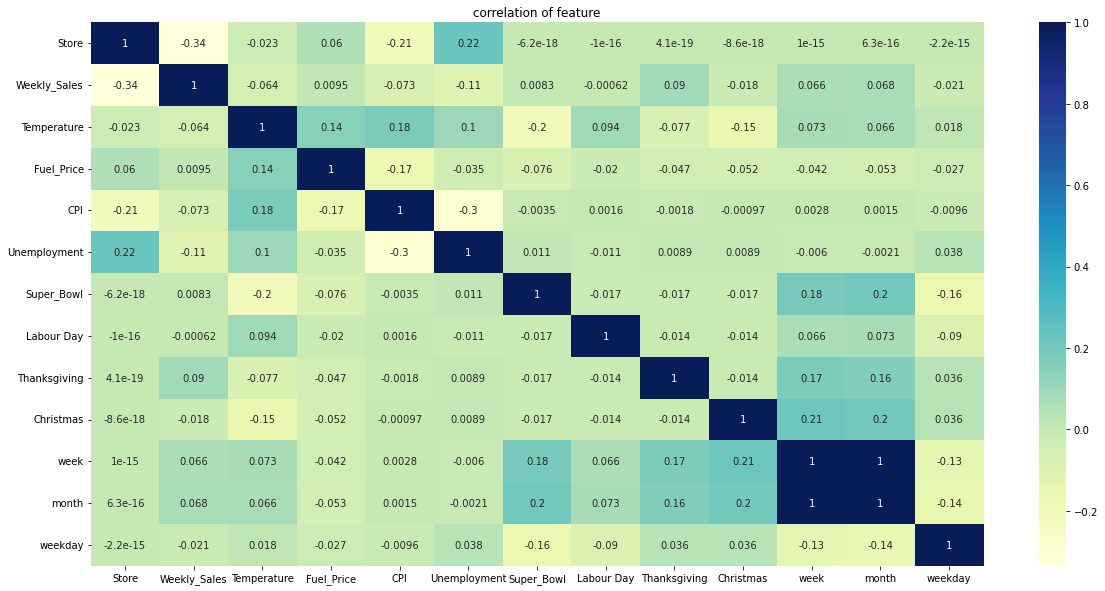

In [30]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True , cmap ="YlGnBu")
plt.title("correlation of feature")

Из матрицы видно, что  Weekly_Sales коррелируется больше всего с конкретным магазином.

In [31]:
grp_store = df.groupby(['Store'])['Weekly_Sales'].sum()
#grp_store 

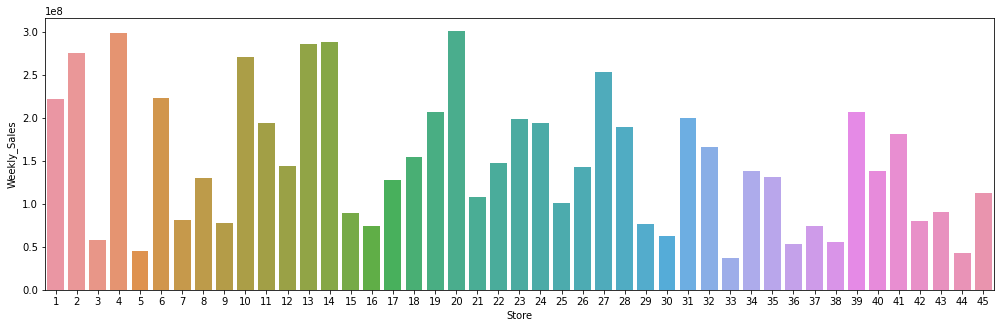

In [32]:
plt.figure(figsize=(17,5))
fig = sns.barplot(x=grp_store.index,y=grp_store)

## Скалирование

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Temperature   6435 non-null   float64
 3   Fuel_Price    6435 non-null   float64
 4   CPI           6435 non-null   float64
 5   Unemployment  6435 non-null   float64
 6   Super_Bowl    6435 non-null   float64
 7   Labour Day    6435 non-null   float64
 8   Thanksgiving  6435 non-null   float64
 9   Christmas     6435 non-null   float64
 10  week          6435 non-null   int64  
 11  month         6435 non-null   int64  
 12  weekday       6435 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 653.7 KB


In [34]:
df = pd.concat([df, pd.get_dummies(df['Store'], prefix="Store")],  axis = 1)
df.drop(['Store'], axis = 1, inplace= True)

In [35]:
y = df['Weekly_Sales']
X = df.drop(['Weekly_Sales'], axis=1)

In [36]:

scaled = (MinMaxScaler(feature_range=(-1,1)).fit_transform(df))
df = pd.DataFrame(scaled, columns = df.columns)


In [37]:
df.head(3)

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Super_Bowl,Labour Day,Thanksgiving,Christmas,week,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,-0.205418,-0.131703,-0.899800,0.681000,-0.189764,-1.0,-1.0,-1.0,-1.0,-0.372549,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-0.206378,-0.206067,-0.923848,0.683882,-0.189764,1.0,-1.0,-1.0,-1.0,0.843137,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,-0.222999,-0.178278,-0.957916,0.684811,-0.189764,-1.0,-1.0,-1.0,-1.0,-0.764706,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.7 , random_state = 42)

In [39]:
X_train.shape

(1930, 56)

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import math
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor


## Модель Линейной регрессии (LinearRegression)

In [41]:
model_LR = LinearRegression(n_jobs=-1)
model_LR.fit(X_train, y_train)

y_predict = model_LR.predict(X_test)

Text(0, 0.5, 'Предсказанная сумма')

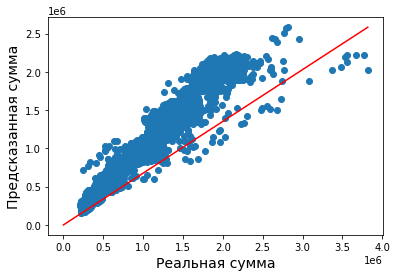

In [42]:
plt.scatter(y_test, y_predict) # координаты точек, соответствущие парам нреальная сумма - предсказанная
plt.plot([0, max(y_test)], [0, max(y_predict)], color = 'red')  # прямая, на которой предсказаные и реальные значения совпадают
plt.xlabel('Реальная сумма', fontsize=14)
plt.ylabel('Предсказанная сумма', fontsize=14)


In [43]:
print("MAE =", mean_absolute_error(y_test, y_predict)) #Средняя абсолютная ошибка регрессионной потери.
print("MSE =", (mean_squared_error(y_test, y_predict))**0.5) # Корень из среднеквадратической ошибки.
print("R2 =", r2_score(y_test, y_predict)) # (коэффициент детерминации) функция оценки регрессии.


MAE = 94745.06971365148
MSE = 151392.43678751215
R2 = 0.9270838953158228


## Модель полиномиальной регрессии (PolynomialFeatures)

In [44]:
model_PR = make_pipeline(PolynomialFeatures(), LinearRegression(n_jobs=-1))
model_PR.fit(X_train, y_train)
y_predict = model_PR.predict(X_test)

Text(0, 0.5, 'Предсказанная сумма')

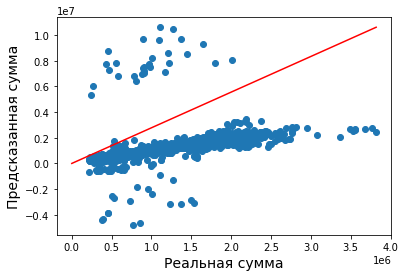

In [45]:
plt.scatter(y_test, y_predict) # координаты точек, соответствущие парам нреальная сумма - предсказанная
plt.plot([0, max(y_test)], [0, max(y_predict)], color = 'red')  # прямая, на которой предсказаные и реальные значения совпадают
plt.xlabel('Реальная сумма', fontsize=14)
plt.ylabel('Предсказанная сумма', fontsize=14)

In [46]:
print("MAE =", mean_absolute_error(y_test, y_predict))
print("MSE =", (mean_squared_error(y_test, y_predict))**0.5)
print("R2 =", r2_score(y_test, y_predict))


MAE = 165230.7016880677
MSE = 654092.5700523435
R2 = -0.3611109658356264


## Метод случайных лесов (RandomForestRegressor)

In [47]:
model_RFR = RandomForestRegressor(random_state=42, n_jobs=-1)
model_RFR.fit(X_train, y_train)
y_predict = model_RFR.predict(X_test)


Text(0, 0.5, 'Предсказанная сумма')

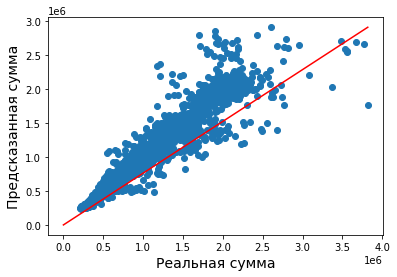

In [48]:
plt.scatter(y_test, y_predict) # координаты точек, соответствущие парам нреальная сумма - предсказанная
plt.plot([0, max(y_test)], [0, max(y_predict)], color = 'red')  # прямая, на которой предсказаные и реальные значения совпадают
plt.xlabel('Реальная сумма', fontsize=14)
plt.ylabel('Предсказанная сумма', fontsize=14)


In [49]:
print("MAE =", mean_absolute_error(y_test, y_predict))
print("MSE =", (mean_squared_error(y_test, y_predict))**0.5)
print("R2 =", r2_score(y_test, y_predict))


MAE = 75758.66510945618
MSE = 147359.5939870823
R2 = 0.9309168815606798


## Линейная модель Лассо

In [50]:
model_Lasso = Lasso(random_state=42)
model_Lasso.fit(X_train, y_train)
y_predict = model_Lasso.predict(X_test)

Text(0, 0.5, 'Предсказанная сумма')

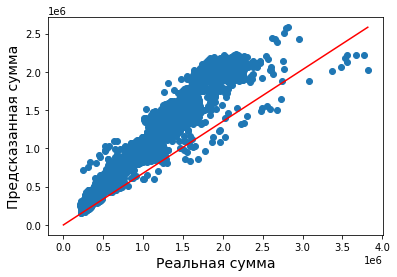

In [51]:
plt.scatter(y_test, y_predict) # координаты точек, соответствущие парам нреальная сумма - предсказанная
plt.plot([0, max(y_test)], [0, max(y_predict)], color = 'red')  # прямая, на которой предсказаные и реальные значения совпадают
plt.xlabel('Реальная сумма', fontsize=14)
plt.ylabel('Предсказанная сумма', fontsize=14)

In [52]:
print("MAE =", mean_absolute_error(y_test, y_predict))
print("MSE =", (mean_squared_error(y_test, y_predict))**0.5)
print("R2 =", r2_score(y_test, y_predict))


MAE = 94732.09927539741
MSE = 151384.5272048004
R2 = 0.927091514202305


## Ридж-регрессия (Ridge)

In [53]:
model_Ridge = Ridge(random_state=42)
model_Ridge.fit(X_train, y_train)
y_predict = model_Ridge.predict(X_test)

Text(0, 0.5, 'Предсказанная сумма')

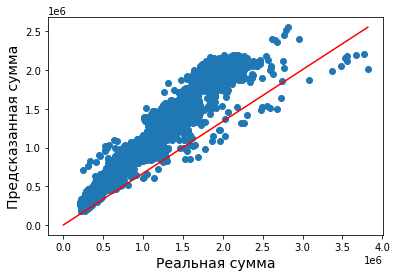

In [54]:
plt.scatter(y_test, y_predict) # координаты точек, соответствущие парам нреальная сумма - предсказанная
plt.plot([0, max(y_test)], [0, max(y_predict)], color = 'red')  # прямая, на которой предсказаные и реальные значения совпадают
plt.xlabel('Реальная сумма', fontsize=14)
plt.ylabel('Предсказанная сумма', fontsize=14)

In [55]:
print("MAE =", mean_absolute_error(y_test, y_predict))
print("MSE =", (mean_squared_error(y_test, y_predict))**0.5)
print("R2 =", r2_score(y_test, y_predict))


MAE = 93518.11476542738
MSE = 150832.63173890742
R2 = 0.927622143280912


# Выводы:

### Модель Линейной регрессии (LinearRegression)
* MAE = 94745.06971365148
* MSE = 151392.43678751215
* R2 = 0.9270838953158228

### Модель полиномиальной регрессии (PolynomialFeatures)¶
* MAE = 165230.7016880677
* MSE = 654092.5700523435
* R2 =-0.3611109658356264

### Метод случайных лесов (RandomForestRegressor)¶
* MAE = 75758.66510945618
* MSE = 147359.5939870823
* R2 = 0.9309168815606798

### Линейная модель Лассо
* MAE = 94732.09927539741
* MSE = 151384.5272048004
* R2 = 0.927091514202305

### Ридж-регрессия (Ridge)¶
* MAE = 93518.11476542738
* MSE = 150832.63173890742
* R2 = 0.927622143280912


* Лучшее значение функции оценки регрессии R2 (коэффициента детерминации) в RandomForestRegressor (ближе всех 1).
* Лучшее значение средней абсолютней ошибки регрессионной потери (MAE), корня из среднеквадратической ошибки (MSE) чем меньше, те лучше, что тоже соответствует RandomForestRegressor.
